In [196]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [325]:
train = pd.read_csv('C:\\Users\\HP\\Desktop\\rapa\\fifa_data\\FIFA_train.csv', encoding='utf-8')
test = pd.read_csv('C:\\Users\\HP\\Desktop\\rapa\\fifa_data\\FIFA_test.csv', encoding='utf-8')
submission = pd.read_csv('C:\\Users\\HP\\Desktop\\rapa\\fifa_data\\submission.csv')
# 데이터 불러오기

In [326]:
train.drop(['id','name'], axis=1, inplace=True)
test.drop(['id','name'], axis=1, inplace=True)

In [199]:
train.contract_until.value_counts() # 계약기간 값들 정렬

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [327]:
# 계약기간값 년도별로 재구성

def func(string:object) -> int:
    string = string[-4:]
    return int(string)

train['contract_until'] = train['contract_until'].apply(func)
test['contract_until'] = test['contract_until'].apply(func)

### 데이터 처리 

In [276]:

train['continent']=train['continent'].astype('category').cat.codes
test['continent'] = test['continent'].astype('category').cat.codes

train['position'] = train['position'].astype('category').cat.codes
test['position'] = test['position'].astype('category').cat.codes

train['prefer_foot'] = train['prefer_foot'].astype('category').cat.codes
test['prefer_foot'] = test['prefer_foot'].astype('category').cat.codes

In [202]:
train.shape, test.shape, submission.shape

((8932, 10), (3828, 9), (3828, 2))

<AxesSubplot:>

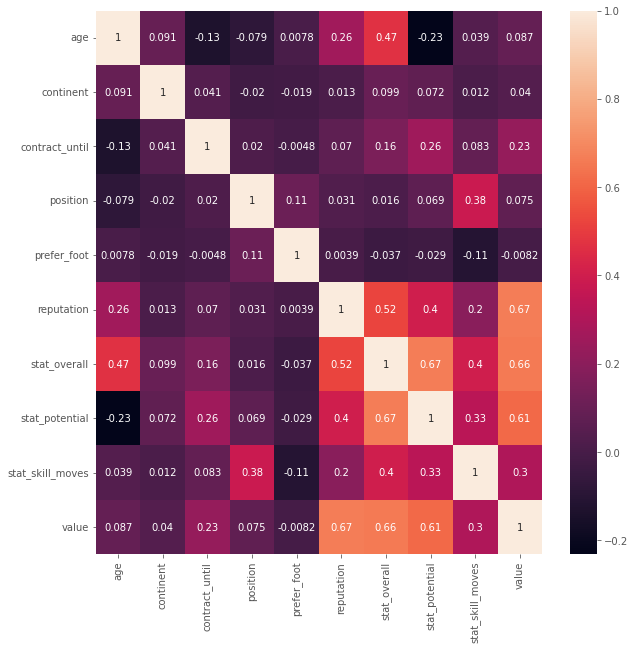

In [203]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True)

<AxesSubplot:>

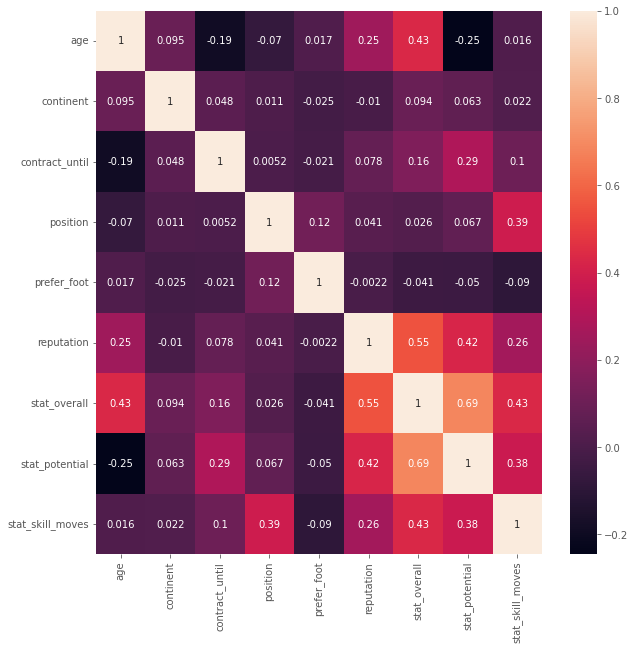

In [204]:
plt.figure(figsize=(10,10))
sns.heatmap(test.corr(), annot=True)

In [205]:
features = ['position', 'stat_overall','stat_potential']
X_train = train[features]
y_train = train['value']
X_test = test[features]

In [206]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(bootstrap=True, n_estimators=300, max_depth=7, random_state=5)

model.fit(X_train, y_train)

# RandomForestRegressor(max_depth=7, n_estimators=300, random_state=5)

y_pred = model.predict(X_test)

submission['value'] = y_pred
submission['value'] = submission['value'].astype(int)

In [207]:
submission

,id,value
0,1,97641749
1,2,75797130
2,4,68299020
3,5,73806056
4,6,68317062
...,...,...
3823,16924,81540
3824,16929,81540
3825,16932,81540
3826,16937,81540


In [208]:
submission.to_csv('답지2.csv', index=False)

### reputation추가

In [209]:
features = ['reputation', 'stat_overall','stat_potential']
X_train = train[features]
y_train = train['value']
X_test = test[features]


model = RandomForestRegressor(bootstrap=True, n_estimators=600, max_depth=5, random_state=9)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=600, random_state=9)

y_pred = model.predict(X_test)

In [210]:
submission['value'] = y_pred
submission['value'] = submission['value'].astype(int)
submission

,id,value
0,1,96207803
1,2,72044070
2,4,61726738
3,5,61864702
4,6,61864702
...,...,...
3823,16924,168179
3824,16929,168179
3825,16932,168179
3826,16937,168179


### 새로운 지표값 생성 age_state(능력치/나이)

In [211]:
train['age_state'] = train['stat_overall']/train['age']
test['age_state'] = test['stat_overall']/test['age']

In [212]:
features = ['age','age_state', 'stat_overall','stat_potential']
X_train = train[features]
y_train = train['value']
X_test = test[features]


model = RandomForestRegressor(bootstrap=True, n_estimators=600, max_depth=5, random_state=9)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=600, random_state=9)

y_pred = model.predict(X_test)

In [213]:
submission['value'] = y_pred
submission['value'] = submission['value'].astype(int)
submission

,id,value
0,1,85327950
1,2,65519810
2,4,65260159
3,5,65238196
4,6,58163566
...,...,...
3823,16924,168179
3824,16929,168179
3825,16932,168179
3826,16937,168179


### EDA

In [214]:
b_train = train.copy()

In [215]:
b_test = test.copy()

In [216]:
b_train.shape, b_test.shape

((8932, 11), (3828, 10))

In [217]:
b_train['continent']=b_train['continent'].astype('category').cat.codes
b_test['continent'] = b_test['continent'].astype('category').cat.codes

b_train['position'] = b_train['position'].astype('category').cat.codes
b_test['position'] = b_test['position'].astype('category').cat.codes

b_train['prefer_foot'] = b_train['prefer_foot'].astype('category').cat.codes
b_test['prefer_foot'] = b_test['prefer_foot'].astype('category').cat.codes

In [218]:
b_train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,age_state
0,31,4,2021,3,0,5.0,94,94,4.0,110500000.0,3.032258
1,27,2,2020,1,1,4.0,91,93,1.0,72000000.0,3.370370
2,31,4,2021,3,1,5.0,91,91,3.0,80000000.0,2.935484
3,32,2,2020,0,1,4.0,91,91,3.0,51000000.0,2.843750
4,25,2,2021,1,1,3.0,90,93,1.0,68000000.0,3.600000
...,...,...,...,...,...,...,...,...,...,...,...
8927,18,0,2019,2,1,1.0,48,63,3.0,60000.0,2.666667
8928,19,2,2020,0,1,1.0,47,59,2.0,40000.0,2.473684
8929,18,4,2021,0,1,1.0,47,64,2.0,50000.0,2.611111
8930,18,2,2021,1,1,1.0,47,65,1.0,50000.0,2.611111


In [219]:
train.info(), test.info()

from sklearn.model_selection import train_test_split
X = b_train.drop(['value'],axis=1)
y = b_train['value']

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   int8   
 2   contract_until    8932 non-null   int64  
 3   position          8932 non-null   int8   
 4   prefer_foot       8932 non-null   int8   
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
 10  age_state         8932 non-null   float64
dtypes: float64(4), int64(4), int8(3)
memory usage: 584.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age            

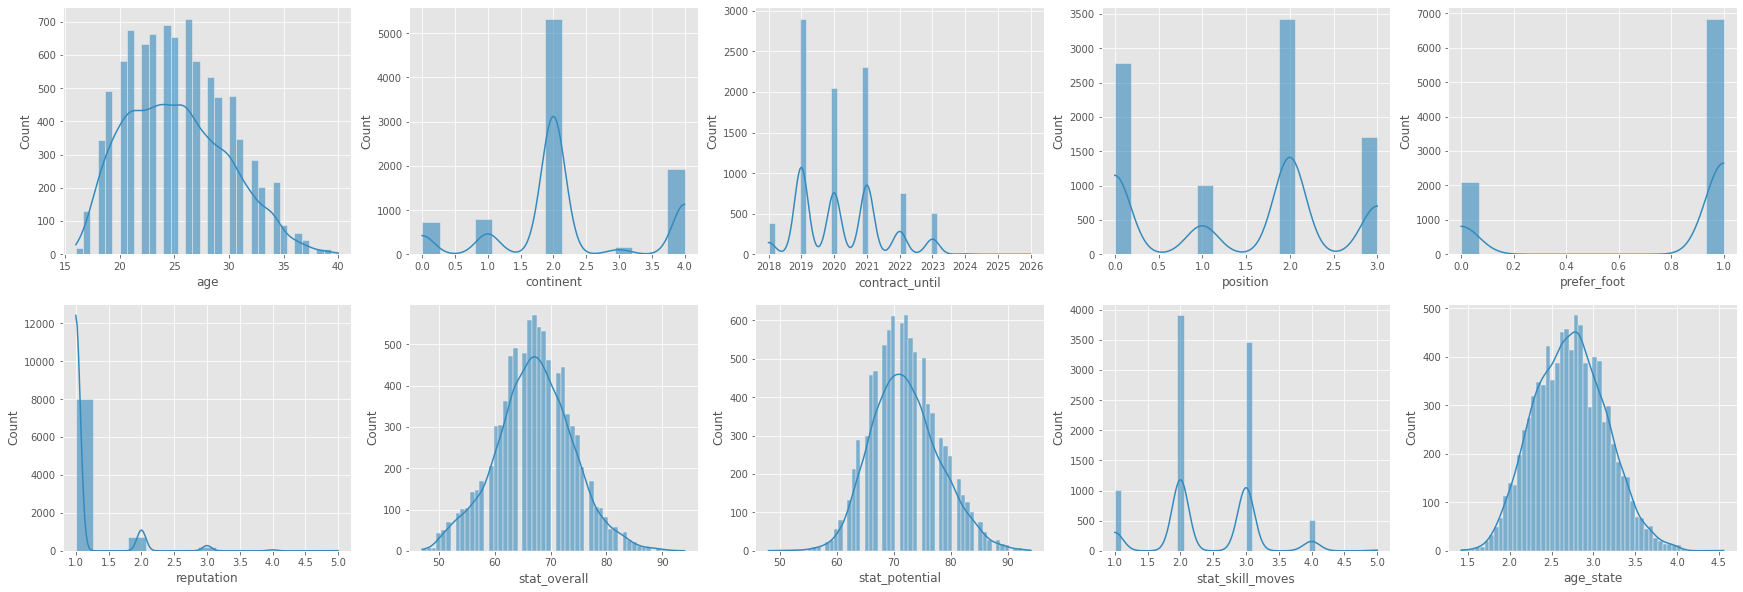

In [220]:
f, axes = plt.subplots(2,5, figsize=(30,10)) # 변수가 10개 이므로 subplots을 (2,5) 로 설정해주었습니다.
axes = axes.flatten()
for col,ax in zip(X.columns, axes):
    sns.histplot(data = X, x=col, ax=ax, alpha=0.6, kde=True)
plt.show()

In [221]:
X = train['reputation'].values
X = X.reshape(-1,1)
X.shape

(8932, 1)

In [222]:
y = train['value'].values
y = y.reshape(-1,1)
y.shape

(8932, 1)

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7145, 1), (1787, 1), (7145, 1), (1787, 1))

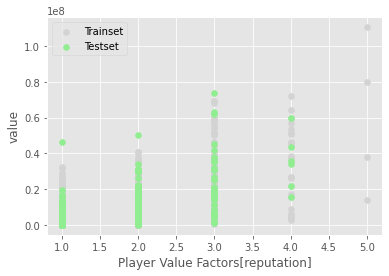

In [224]:
def draw_data():
  plt.scatter(X_train, y_train, label='Trainset', color='lightgray')
  plt.scatter(X_test, y_test, label='Testset', color='lightgreen')
  plt.xlabel('Player Value Factors[reputation]')
  plt.ylabel('value')
  plt.legend()
draw_data()

In [225]:
X = train['stat_overall'].values
X = X.reshape(-1,1)
X.shape

(8932, 1)

In [226]:
y = train['value'].values
y = y.reshape(-1,1)
y.shape

(8932, 1)

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7145, 1), (1787, 1), (7145, 1), (1787, 1))

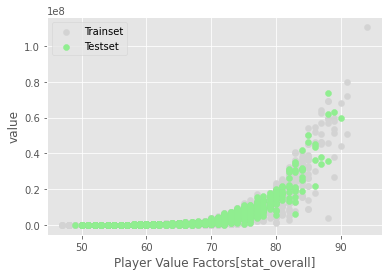

In [228]:
def draw_data():
    plt.scatter(X_train, y_train, label='Trainset', color='lightgray')
    plt.scatter(X_test, y_test, label='Testset', color='lightgreen')
    plt.xlabel('Player Value Factors[stat_overall]')
    plt.ylabel('value')
    plt.legend()
draw_data()

In [229]:
b_train["log_value"] = np.log(b_train['value'])
log_value = b_train["log_value"]

<AxesSubplot:xlabel='log_value', ylabel='Count'>

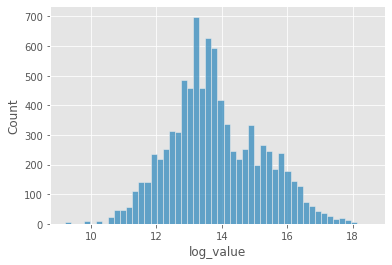

In [230]:
# 연봉 로그값의 분포도 그래프
sns.histplot(log_value)

<AxesSubplot:xlabel='age', ylabel='value'>

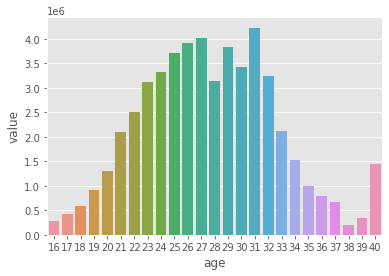

In [231]:
# 나이대별 평균 연봉 (로그값)
age_value_mean = b_train.groupby("age")["value"].mean()
age_value_mean = age_value_mean.reset_index()

sns.barplot(x="age",y="value",data=age_value_mean)

<AxesSubplot:xlabel='age', ylabel='log_value'>

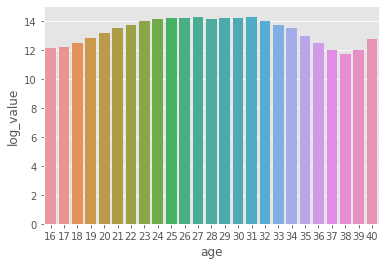

In [232]:
# 나이대별 평균 연봉 (로그값)
age_value_mean = b_train.groupby("age")["log_value"].mean()
age_value_mean = age_value_mean.reset_index()

sns.barplot(x="age",y="log_value",data=age_value_mean)

<AxesSubplot:xlabel='age', ylabel='reputation'>

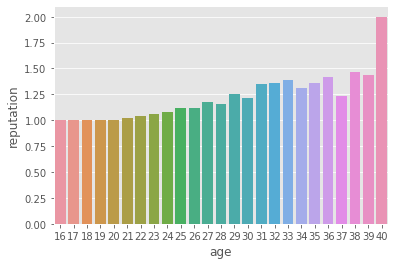

In [233]:
# 나이대별 평균 인기도
age_value_mean = b_train.groupby("age")["reputation"].mean()
age_value_mean = age_value_mean.reset_index()

sns.barplot(x="age",y="reputation",data=age_value_mean)

<AxesSubplot:xlabel='prefer_foot', ylabel='value'>

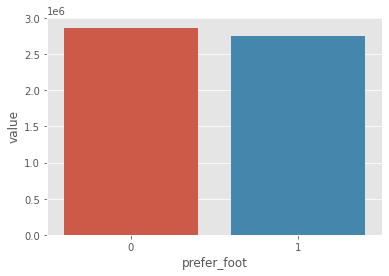

In [234]:
# 왼발0 오른발1 사용 발별 연봉 
age_value_mean = b_train.groupby("prefer_foot")["value"].mean()
age_value_mean = age_value_mean.reset_index()

sns.barplot(x="prefer_foot",y="value",data=age_value_mean)

In [235]:
b_train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,age_state,log_value
0,31,4,2021,3,0,5.0,94,94,4.0,110500000.0,3.032258,18.520526
1,27,2,2020,1,1,4.0,91,93,1.0,72000000.0,3.370370,18.092177
2,31,4,2021,3,1,5.0,91,91,3.0,80000000.0,2.935484,18.197537
3,32,2,2020,0,1,4.0,91,91,3.0,51000000.0,2.843750,17.747336
4,25,2,2021,1,1,3.0,90,93,1.0,68000000.0,3.600000,18.035018
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,18,0,2019,2,1,1.0,48,63,3.0,60000.0,2.666667,11.002100
8928,19,2,2020,0,1,1.0,47,59,2.0,40000.0,2.473684,10.596635
8929,18,4,2021,0,1,1.0,47,64,2.0,50000.0,2.611111,10.819778
8930,18,2,2021,1,1,1.0,47,65,1.0,50000.0,2.611111,10.819778


### LinearRegression 구현

In [328]:
lables= train['value']
lables

0       110500000.0
1        72000000.0
2        80000000.0
3        51000000.0
4        68000000.0
           ...     
8927        60000.0
8928        40000.0
8929        50000.0
8930        50000.0
8931        60000.0
Name: value, Length: 8932, dtype: float64

In [329]:
train.drop(['value'], axis=1, inplace=True)

In [238]:
# lables값 확인
lables

0       110500000.0
1        72000000.0
2        80000000.0
3        51000000.0
4        68000000.0
           ...     
8927        60000.0
8928        40000.0
8929        50000.0
8930        50000.0
8931        60000.0
Name: value, Length: 8932, dtype: float64

In [330]:
# ojbect 타입 list변환후 출력
olist=train.dtypes[train.dtypes=='object'].index
olist = list(olist)
olist

['continent', 'position', 'prefer_foot']

In [331]:
# dummies로 변수창출 후 원변수 제거
for x in olist:
    train = pd.concat((train, pd.get_dummies(train[x])), axis=1)
    test = pd.concat((test, pd.get_dummies(test[x])), axis=1)
    train.drop(x,axis=1,inplace=True)
    test.drop(x,axis=1,inplace=True)

In [343]:
train.shape, lables.shape

((8932, 17), (8932,))

In [349]:
lables.shape

(8932,)

In [357]:
lables

0       110500000.0
1        72000000.0
2        80000000.0
3        51000000.0
4        68000000.0
           ...     
8927        60000.0
8928        40000.0
8929        50000.0
8930        50000.0
8931        60000.0
Name: value, Length: 8932, dtype: float64

In [355]:
# 초기 LinearRegression값

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


x_train,x_test,y_train,y_test = train_test_split(train, lables,
                                                 test_size=0.2,
                                                 random_state= 111)

model = LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [356]:
pred[-5]


-1325011.027151227

In [352]:
y_test

987     5500000.0
1065    8500000.0
3846     270000.0
6703     550000.0
8438     180000.0
          ...    
7056     240000.0
5813     525000.0
7296     375000.0
928     7500000.0
5577     575000.0
Name: value, Length: 1787, dtype: float64

In [342]:
test

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,africa,asia,europe,oceania,south america,DF,GK,MF,ST,left,right
0,33,2022,5.0,94,94,5.0,0,0,1,0,0,0,0,0,1,0,1
1,26,2022,5.0,92,93,5.0,0,0,0,0,1,0,0,0,1,0,1
2,27,2023,4.0,91,92,4.0,0,0,1,0,0,0,0,1,0,0,1
3,27,2020,4.0,91,91,4.0,0,0,1,0,0,0,0,0,1,0,1
4,32,2020,4.0,91,91,4.0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,20,2021,1.0,48,63,2.0,0,1,0,0,0,0,0,1,0,0,1
3824,18,2018,1.0,48,65,1.0,0,0,1,0,0,0,1,0,0,0,1
3825,18,2021,1.0,48,65,2.0,0,0,0,0,1,0,0,1,0,0,1
3826,18,2020,1.0,47,61,2.0,0,0,1,0,0,0,0,0,1,0,1


In [334]:
pred = model.predict(test)
pred.shape

(3828,)

In [345]:
pred = submission['value']
submission['value']

0       3.747021e+07
1       3.943908e+07
2       3.236755e+07
3       3.139255e+07
4       2.935333e+07
            ...     
3823   -4.587110e+06
3824   -4.803735e+06
3825   -4.197025e+06
3826   -4.915754e+06
3827   -4.579700e+06
Name: value, Length: 3828, dtype: float64

In [337]:
pred

array([37470207.23316526, 39439077.00361359, 32367554.11467111, ...,
       -4197024.79316914, -4915754.23931837, -4579700.11487794])

In [346]:
pred.astype(int)

0       37470207
1       39439077
2       32367554
3       31392553
4       29353330
          ...   
3823    -4587110
3824    -4803734
3825    -4197024
3826    -4915754
3827    -4579700
Name: value, Length: 3828, dtype: int32

In [302]:
model.fit(x_train, y_train) 
model.coef_, model.intercept_

(array([-350294.22482719,  156520.89917778,  508981.60218844,
         145156.70018278, -263094.0528103 , 7543780.83718435,
         457521.14202117,   12724.36274947, -136724.15534907]),
 -1056637738.7965863)

In [303]:
# 스코어점수
model.score(x_test, y_test)

0.6297023226946008

In [304]:
y_test

987     5500000.0
1065    8500000.0
3846     270000.0
6703     550000.0
8438     180000.0
          ...    
2585    1400000.0
6158     775000.0
1763     270000.0
566     8500000.0
2298    2400000.0
Name: value, Length: 8039, dtype: float64

In [305]:
submission['value'] = y_test

In [306]:
submission

,id,value
0,1,110500000.0
1,2,72000000.0
2,4,80000000.0
3,5,51000000.0
4,6,68000000.0
...,...,...
3823,16924,1100000.0
3824,16929,925000.0
3825,16932,60000.0
3826,16937,950000.0


In [307]:
submission.to_csv('답지3.csv', index=False)

### 대륙분포 제거 버전

In [423]:
# 불필요해보이는 대륙분포를 제거
tss = train.drop(train.iloc[:,6:11],axis=1)

In [424]:
#대륙 제거한 train값 
tss

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,DF,GK,MF,ST,left,right
0,31,2021,5.0,94,94,4.0,0,0,0,1,1,0
1,27,2020,4.0,91,93,1.0,0,1,0,0,0,1
2,31,2021,5.0,91,91,3.0,0,0,0,1,0,1
3,32,2020,4.0,91,91,3.0,1,0,0,0,0,1
4,25,2021,3.0,90,93,1.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,18,2019,1.0,48,63,3.0,0,0,1,0,0,1
8928,19,2020,1.0,47,59,2.0,1,0,0,0,0,1
8929,18,2021,1.0,47,64,2.0,1,0,0,0,0,1
8930,18,2021,1.0,47,65,1.0,0,1,0,0,0,1


In [425]:
x_train,x_test,y_train,y_test = train_test_split(tss, lables,
                                                 test_size=0.3,
                                                 random_state= 111)

model = LinearRegression()
model.fit(x_test,y_test)

LinearRegression()

In [426]:
model.fit(x_train, y_train) 
model.coef_, model.intercept_

(array([-393739.11873111,  351376.7040645 , 6454357.60725952,
         497223.95940886,  -49922.38799482,  135650.55892296,
        -422236.51280548,  592597.83964969,  -57687.10665778,
        -112674.22018643,  -18857.97593399,   18857.97593399]),
 -734436262.2502766)

In [427]:
model.score(x_test, y_test)

0.6205464373371865

In [452]:
y_test

987      5500000.0
1065     8500000.0
3846      270000.0
6703      550000.0
8438      180000.0
           ...    
191     12500000.0
4955      525000.0
641     12500000.0
5583      575000.0
7692      375000.0
Name: value, Length: 2680, dtype: float64

In [454]:
import statsmodels.api as sm
x2= sm.add_constant(x_test)

model_sm1 = sm.OLS(y_test, x2)
result1= model_sm1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     443.2
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:58:35   Log-Likelihood:                -44157.
No. Observations:                2680   AIC:                         8.834e+04
Df Residuals:                    2669   BIC:                         8.840e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.311e+08   6.42e+07  

### stat_skill_moves  제거버전

In [308]:
train.drop(['stat_skill_moves'], axis=1, inplace=True)

In [309]:
test.drop(['stat_skill_moves'], axis=1, inplace=True)

In [458]:
train

,age,contract_until,reputation,stat_overall,stat_potential,africa,asia,europe,oceania,south america,DF,GK,MF,ST,left,right
0,31,2021,5.0,94,94,0,0,0,0,1,0,0,0,1,1,0
1,27,2020,4.0,91,93,0,0,1,0,0,0,1,0,0,0,1
2,31,2021,5.0,91,91,0,0,0,0,1,0,0,0,1,0,1
3,32,2020,4.0,91,91,0,0,1,0,0,1,0,0,0,0,1
4,25,2021,3.0,90,93,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,18,2019,1.0,48,63,1,0,0,0,0,0,0,1,0,0,1
8928,19,2020,1.0,47,59,0,0,1,0,0,1,0,0,0,0,1
8929,18,2021,1.0,47,64,0,0,0,0,1,1,0,0,0,0,1
8930,18,2021,1.0,47,65,0,0,1,0,0,0,1,0,0,0,1


In [316]:
x_train,x_test,y_train,y_test = train_test_split(train, lables,
                                                 test_size=0.9,
                                                 random_state= 111)

model = LinearRegression()
model.fit(x_test,y_test)

LinearRegression()

In [317]:
model.fit(x_train, y_train) 
model.coef_, model.intercept_

(array([-344248.30428969,  159224.74258071,  509637.77432671,
         106122.65706141, -230833.38339653, 7549933.18596084,
         447402.54702439,   15332.21184624]),
 -1057933516.2329642)

In [318]:
model.score(x_test, y_test)

0.6294678404754107

In [319]:
import statsmodels.api as sm
x2= sm.add_constant(x_test)

model_sm1 = sm.OLS(y_test, x2)
result1= model_sm1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     1850.
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:38:25   Log-Likelihood:            -1.3232e+05
No. Observations:                8039   AIC:                         2.647e+05
Df Residuals:                    8030   BIC:                         2.647e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -7.042e+08   6.31e+07    -11.

In [320]:
submission['value'] = y_test

submission.to_csv('답지4.csv', index=False)

### PCA 테스트

In [472]:
train = pd.read_csv('C:\\Users\\HP\\Desktop\\rapa\\fifa_data\\FIFA_train.csv', encoding='utf-8')

In [473]:
train.drop(['id','stat_overall','continent','contract_until','prefer_foot','position','value'], axis=1, inplace=True)

In [486]:
train=train.sample(10)

In [487]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# 1. 데이터 분리
soccer_values = train[['reputation','age','stat_potential']]
soccer_name = train['name']

# 2. 스케일러로 값 변환
# scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(soccer_values.values)
soccer_scaled = scaler.transform(soccer_values.values)

soccer_scaled.shape




# 3. PCA 모델링
# - PCA.fit() : 주성분 찾음
# - PCA.transform() : 새로운 주성분으로 데이터 변환

# PCA modelling 
from sklearn.decomposition import PCA

pca_soccer = PCA()
pca_soccer.fit(soccer_scaled)

# data transform
X_pca_soccer = pca_soccer.transform(soccer_scaled)

# look into data shape
print("original data : {}".format(str(soccer_scaled.shape)))
print("transform data : {}".format(str(X_pca_soccer.shape)))


original data : (10, 3)
transform data : (10, 3)


In [488]:
pca_soccer.components_

array([[ 0.54106094,  0.6481343 , -0.5358871 ],
       [ 0.69947969,  0.00693355,  0.71461884],
       [ 0.46688459, -0.76149449, -0.44960531]])

In [489]:
pc1=0
pc2=0
pc3=0
# pc4=0

for j in range(len(pca_soccer.components_)):
    pc1 += pca_soccer.components_[0][j] * soccer_scaled[:,j] # 계수 3개에 있어서 스케일된 모든 열을 다 곱하고 더한 것 = pc1
    pc2 += pca_soccer.components_[1][j] * soccer_scaled[:,j]
    pc3 += pca_soccer.components_[2][j] * soccer_scaled[:,j]
#    pc4 += pca_soccer.components_[3][j] * soccer_scaled[:,j]
    
pc1 = pc1.reshape(-1 ,1)
pc2 = pc2.reshape(-1 ,1)
pc3 = pc3.reshape(-1 ,1)
# pc4 = pc3.reshape(-1 ,1)

# np.round(np.hstack((pc1,pc2,pc3,pc4)),4) == np.round(X_pca_soccer,4)
np.round(np.hstack((pc1,pc2,pc3)),3) == np.round(X_pca_soccer,3)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

C:\Users\HP\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 281 (\N{LATIN SMALL LETTER E WITH OGONEK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 324 (\N{LATIN SMALL LETTER N WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 263 (\N{LATIN SMALL LETTER C WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


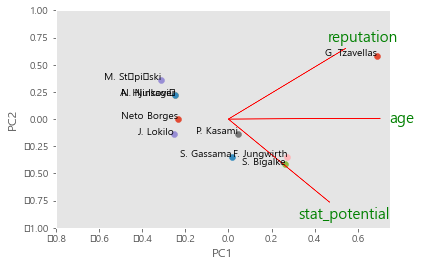

In [490]:
def biplot2(score, coeff, label, pcax, pcay, labels = None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    for i in range(len(xs)):
        plt.scatter(xs[i]*scalex, ys[i]*scaley)
        plt.annotate(label.iloc[i], xy=(xs[i]*scalex, ys[i]*scaley), ha='right')
        
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2], color='r', alpha=1)
        if labels is None:
            plt.text(coeff[i,pca1]*1.15, coeff[i,pca2]*1.15, "Var"+str(i+1), color='g', ha = 'center', va='center')
        else:
            plt.text(coeff[i,pca1]*1.15, coeff[i,pca2]*1.15, labels[i], color='g', ha='center', va='center', size=15)
    plt.xlim(-0.8, 0.75)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
    
    
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline
biplot2(X_pca_soccer, pca_soccer.components_, soccer_name, 1,2,labels=soccer_values.columns)